# Introduction to Sklearn

Scikit-learn or for short sklearn is a machine library used in python for implementation of machine learning algorithms and methodologies. It is basically built on numpy and scipy and matplotlib. This is an open source library, available for all. It has a variety modules, each serving their own specific purpose. Some of these are listed below.
- Classification
- Regression
- Clustering
- Dimensionality Reduction
- Model Selection
- PreProcessing<br><br>
The details of these modules can be found [here](https://scikit-learn.org/stable/index.html)<br>
Also the detailed documentation of sklearn can be [here](https://scikit-learn.org/stable/user_guide.html)


## Dealing with Missing Values in Sklearn

Sklearn provides and imputer class which is used to handle missing values in your data. The missing values in your data are often represented as np.NaN. Here NaN means a null value. Your machine learning algorithms are not able to cater the null values in your data sets and we all know that data sets are never perfects. It has alot of ambiguities and missing values. Therefore, to cater missing values in your data, there is a class of imputer which helps in removing or dealing with nulls. Let us have a look at the example below.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd

The following line of code is used to import the Simple Imputer in sklearn

In [2]:
from sklearn.impute import SimpleImputer

In [3]:
#Making a data frame
df = pd.DataFrame([["a", "x"],[np.nan, "y"],["a", np.nan],["b", "y"]], dtype="category")
df

,0,1
0,a,x
1,NaN,y
2,a,NaN
3,b,y


In [4]:
# Making the object of imputer 
imp1= SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [5]:
# Displaying final results after applying
final_result=imp1.fit_transform(df)
final_result

array([['a', 'x'],
       ['a', 'y'],
       ['a', 'y'],
       ['b', 'y']], dtype=object)

In [6]:
df=pd.DataFrame(data=final_result)
df

,0,1
0,a,x
1,a,y
2,a,y
3,b,y


### Task 1: Make a new numeric dataframe having numeric values. The details of the dataframe should be as following:
- two columns
- 5 rows
- 2 null values in first column and 1 null in second column.
### After making the data frame, handle the missing values and display results.
*Hint: Your strategy this time should be mean.*

In [11]:
# Write code here to make the dataframe
df_num= pd.DataFrame([[2,7],[4,np.nan],[np.nan,3],[7,8],[np.nan,5]])
df_num

,0,1
0,2.0,7.0
1,4.0,NaN
2,NaN,3.0
3,7.0,8.0
4,NaN,5.0


In [12]:
# Write code here to handle missing values
imp2=SimpleImputer(missing_values=np.nan,strategy='mean')

In [13]:
# write the code to display final results
final_results2= imp2.fit_transform(df_num)
final_results2

array([[2.        , 7.        ],
       [4.        , 5.75      ],
       [4.33333333, 3.        ],
       [7.        , 8.        ],
       [4.33333333, 5.        ]])

## Feature Transformation

Feature transformation is an important step in data preprocessing where features are transformed as per requirements for our models. Machine learning models tend to perform more accuractely if certain features are transformed according to specifications. Transformation in sklearn can be done by the following two famous methods mostly:<br>
- scaling
- one-hot encoding

### Scaling
Scaling is done on your numeric attributes to bring them all on to same scale. The data values in your data set can be in different ranges. It is better to transform into a single range so that application of machine learning tasks gets better results. There are different types of scaling:<br>
![title](scaling.png)<br>
Let us have a look at an example of how scaling can be done.

In [18]:
# Importing the necessary library
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Making an object and relevant data for it.
data=[[2,5],[1,0],[6,3],[9,1],[8,0]]
scaler=MinMaxScaler()
data

[[2, 5], [1, 0], [6, 3], [9, 1], [8, 0]]

In [20]:
# Applying it on your data
data=scaler.fit_transform(data)
data

array([[0.125, 1.   ],
       [0.   , 0.   ],
       [0.625, 0.6  ],
       [1.   , 0.2  ],
       [0.875, 0.   ]])

### One-Hot Encoding
One hot encoding is done for transformation of categorical variables into numerical ones so that machine learning models can be applied on to them. As there are some models which cannot deal with categorical values directly therefore, a conversion into numerical values is required. Sklearn provides this facility. Let us see the example below.

In [21]:
# Importing required library module
from sklearn.preprocessing import OneHotEncoder

In [22]:
# Making the variables
gender=['male','female']
location=['Pakistan','UAE','UK','Saudi Arabia']
browser=['Chrome','Firefox','Safari','Internet Explorer']

In [23]:
# Our data 
X=[['female','Pakistan','Safari'],['male','UAE','Firefox'],['female','UK','Safari']]

In [24]:
# Making object of One Hot Encoder
encoder= OneHotEncoder(categories=[gender,location,browser])
encoder.fit(X)

OneHotEncoder(categorical_features=None,
       categories=[['male', 'female'], ['Pakistan', 'UAE', 'UK', 'Saudi Arabia'], ['Chrome', 'Firefox', 'Safari', 'Internet Explorer']],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [25]:
num_data= encoder.transform(X).toarray()
num_data

array([[0., 1., 1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0.]])

In [ ]:
num_data2=encoder.fit_transform(X).toarray()
num_data2

## Dimension Reduction (PCA)

Dimension Reduction is a very important part of Machine Learning and widely used in industry. In real life scenarios, we do not deal with a limited number of features. In fact, there are huge sets of features ranging to 1000 and 2000 and so on. In these scenarios, one needs to identify important set of features and for that reduce the dimenion data. Dimension reduction can be helful in case of visualizations an also help your machine learning model to learn faster as there will be less data to learn from. Let us look at the example ahead to understand about dimension reduction using PCA.

In [26]:
# load dataset into Pandas DataFrame
df_iris = pd.read_csv('iris.csv')
df_iris.head(2)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


### Task 2: Standardize the data frame after separating features and targets. Use standard scaling in this task. 

In [27]:
# Write code here to assign features to x
x= df_iris.loc[:,:'petal width']
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_iris.columns

In [28]:
# Write code here to assign target to y
y= df_iris.loc[:,'target':]
y.head()

,target
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [29]:
# Write code here to standardize
scaler2=StandardScaler()
x= scaler2.fit_transform(x)

In [30]:
x=pd.DataFrame(x,columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
x.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


**Applying PCA: Importing it from sklearn**

In [31]:
from sklearn.decomposition import PCA

In [32]:
# Making objects and applying it on the data set
pca=PCA(n_components=2)
pca_data=pca.fit_transform(x)

In [33]:
#making data frame of PCA applied results
pca_df= pd.DataFrame(data=pca_data,columns=['Component_1','Component_2'])
pca_df.head()

,Component_1,Component_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [34]:
# Making a final Data frame
final_df= pd.concat([pca_df,df_iris['target']],axis=1)
final_df.head()

,Component_1,Component_2,target
0,-2.264703,0.480027,Setosa
1,-2.080961,-0.674134,Setosa
2,-2.364229,-0.341908,Setosa
3,-2.299384,-0.597395,Setosa
4,-2.389842,0.646835,Setosa


**Explained Variance**

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information. Please make sure that if your explained various is above 85% then PCA must be applied else it should be ignored coz most of the information will be lost.

In [35]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

**Plotting**

In [36]:
import matplotlib.pyplot as plt

In [37]:
final_df['target'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [38]:
targets = ['Setosa', 'Versicolor', 'Virginica']
colors = ['r', 'g', 'b']


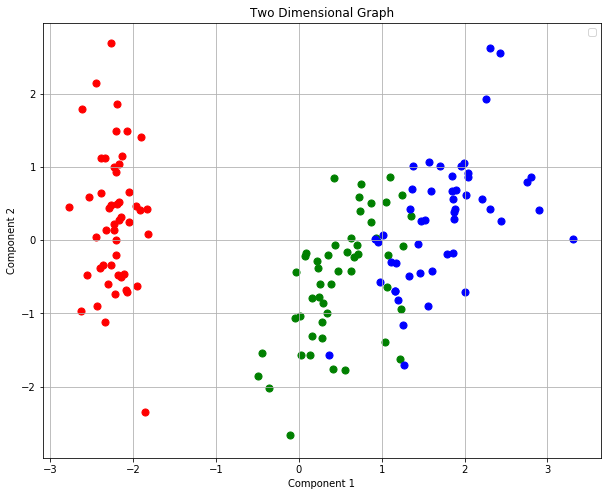

In [41]:
plt.figure(figsize=(10,8))
plt.title('Two Dimensional Graph')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(targets)
plt.grid(True)
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    plt.scatter(final_df.loc[indicesToKeep, 'Component_1']
               , final_df.loc[indicesToKeep, 'Component_2']
               , c = color
               , s = 50)

## Decision Trees

Decision Tree is one of the classification algorithm widely used. We will be now applying models on our titanic data set to do predictios.

### Task 3: Load Data 'titanic_clean.csv'

In [42]:
# Write Code Here
data = pd.read_csv('titanic_clean.csv')
df_titanic = data.copy()
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


### Doing One Hot Encoding

In [43]:
df_OneHot=pd.get_dummies(df_titanic,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
df_titanic

In [44]:
df_titanic=df_OneHot.copy()
df_titanic.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


### Create dependent and independent variables

In [45]:
X = df_titanic.drop(['PassengerId','Survived'], axis=1)
Y = df_titanic['Survived']

### Split the data into training and testing set and set the random state to 100

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=100)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623,)
(268, 30) (268,)


### Defining Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf_dt = DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=100)

In [51]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [52]:
dt_pred = clf_dt.predict(xtest)

### Accuracy for Decision Tree

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_dt = accuracy_score(ytest,dt_pred)
accuracy_dt

0.8507462686567164